<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/MallCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing Dataset**

In [37]:
df = pd.read_csv(r'/content/Mall_Customers_lbndf.csv')
df.shape

(200, 5)

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
# Null/NAN Values checking
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
# Zero values count column-wise
df.eq(0).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Data Preprocessing**

In [42]:
df = df.drop('CustomerID', axis=1)

In [43]:
#doornumber columns
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [44]:
# Assigning Gender column Male:1 & Female as 0
try:
  df['Gender'] = df['Gender'].replace(['Male','Female'],[1, 0])
except:
  pass

In [45]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


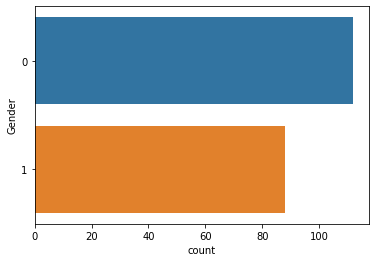

In [46]:
#plt.pyplot.figure(figsize=(10,10))
ax = sns.countplot(y='Gender', data=df)

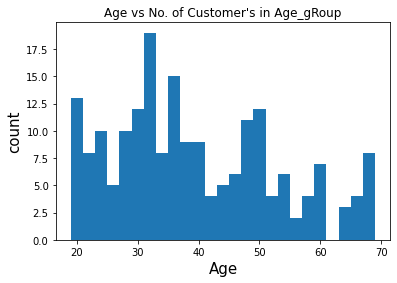

In [47]:
plt.hist(df['Age'], bins = np.arange(19,70,2))
plt.xlabel('Age',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title("Age vs No. of Customer's in Age_gRoup")
plt.show()
plt.show() 

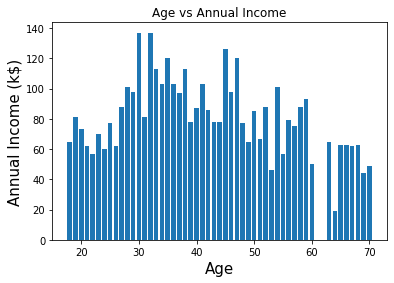

In [48]:

plt.bar(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age',fontsize=15)
plt.ylabel('Annual Income (k$)',fontsize=15)
plt.title("Age vs Annual Income")
plt.show()

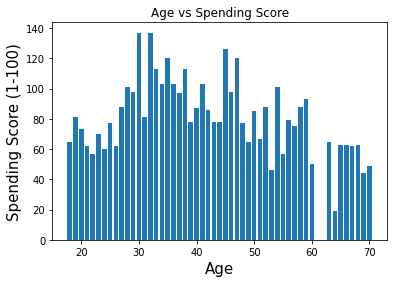

In [49]:
plt.bar(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.title("Age vs Spending Score")
plt.show()

In [50]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


***Clustering***

In [51]:
from sklearn.cluster import KMeans 

In [55]:
wcss=[]
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(df)
  wcss.append(km.inertia_)


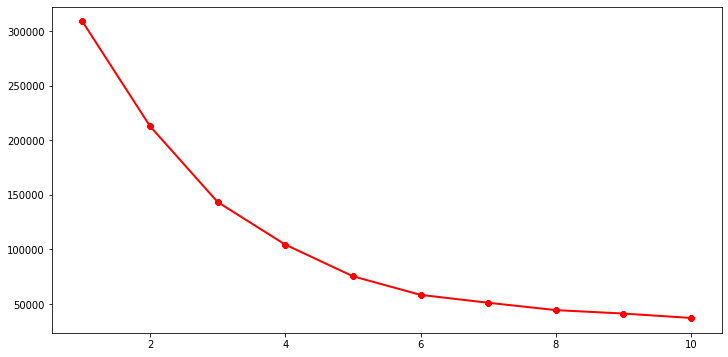

In [56]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color='red',marker='8')
plt.show()

In [60]:
km1 = KMeans(n_clusters=5)
km1.fit(df)

# km1.labels_  >>> can also be used  
y = km1.predict(df) 
print(y)



[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


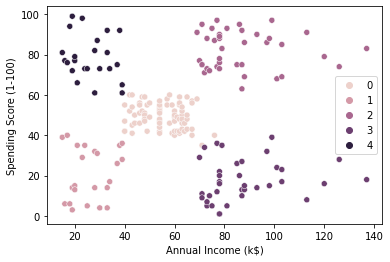

In [65]:
sns.scatterplot(y = 'Spending Score (1-100)', x = 'Annual Income (k$)', data = df, hue = y)

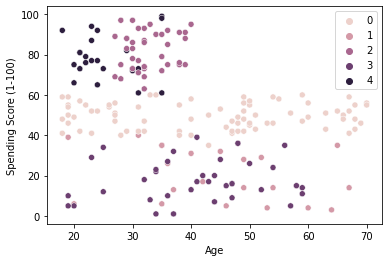

In [66]:
sns.scatterplot(y = 'Spending Score (1-100)', x = 'Age', data = df, hue = y)

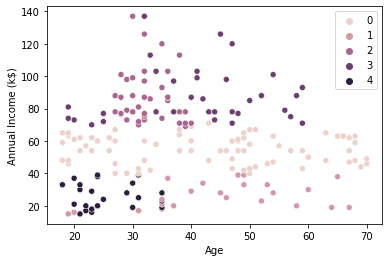

In [67]:
sns.scatterplot(y = 'Annual Income (k$)', x = 'Age', data = df, hue = y)

***Anual Income vs Score***